In [3]:
import sys
import os
# 현재 작업 디렉토리를 얻습니다.
current_directory = os.getcwd()
print(current_directory)
# 상위 디렉토리의 경로를 계산합니다.
parent_directory = os.path.abspath(os.path.join(current_directory, '..'))
print(parent_directory )
# 상위 디렉토리를 sys.path에 추가합니다.
sys.path.insert(0, parent_directory)
# 이제 상위 디렉토리의 모듈을 불러올 수 있습니다.
from ANN.factory_model import factory_model, create_models , models_cv
from ANN.cv import ClfiCV, RegCV
from ANN.get import get, prepro
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score

In [2]:
mdf = pd.read_csv("data/realfinal.csv")
mdf['사고연도']= mdf['사고연도'].astype(object)
mdf['사고시간']= mdf['사고시간'].astype(object)
mdf['사고월'] = mdf['사고월'].astype(object)
mdf =mdf.drop(columns=['시군구','사고일시','Unnamed: 0.1','Unnamed: 0','ID','사고일시'])
mdf.to_csv('data/base2.csv')
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50572 entries, 0 to 50571
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요일      50572 non-null  object
 1   기상상태    50572 non-null  object
 2   도로형태    50572 non-null  object
 3   노면상태    50572 non-null  object
 4   사고유형    50572 non-null  object
 5   동       50572 non-null  object
 6   사고연도    50572 non-null  object
 7   사고시간    50572 non-null  object
 8   사고월     50572 non-null  object
 9   하루시간구분  50572 non-null  object
dtypes: object(10)
memory usage: 3.9+ MB


In [4]:
df = prepro("data/base2.csv",[])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50572 entries, 0 to 50571
Columns: 212 entries, Unnamed: 0 to 하루시간구분_night
dtypes: int32(208), int64(4)
memory usage: 41.7 MB


In [5]:
tdf = pd.read_csv("data/target.csv")

split_index = 39608
trn_df = df.loc[:split_index]
tst_df = df.loc[split_index + 1:]

tdf =tdf.drop(columns=['Unnamed: 0'])
# trn_df.info() ,tst_df.info(), tdf.info()

In [8]:
X_trn = trn_df.values
y_trn = tdf.values
X_tst = tst_df.values
model = factory_model(X_trn,y_trn,"config.json")
model.fit(X_trn,y_trn)

c:\Users\user\miniconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Average Training Loss: 1362.1968
Epoch 2/100, Average Training Loss: 20.9081
Epoch 3/100, Average Training Loss: 17.5548
Epoch 4/100, Average Training Loss: 16.8733
Epoch 5/100, Average Training Loss: 16.5598
Epoch 6/100, Average Training Loss: 16.2783
Epoch 7/100, Average Training Loss: 16.0906
Epoch 8/100, Average Training Loss: 15.9971
Epoch 9/100, Average Training Loss: 15.7576
Epoch 10/100, Average Training Loss: 15.8306
Epoch 11/100, Average Training Loss: 15.6105
Epoch 12/100, Average Training Loss: 15.5478
Epoch 13/100, Average Training Loss: 15.7392
Epoch 14/100, Average Training Loss: 15.5695
Epoch 15/100, Average Training Loss: 15.5773
Epoch 16/100, Average Training Loss: 15.6688
Epoch 17/100, Average Training Loss: 15.4704
Epoch 18/100, Average Training Loss: 15.5436
Epoch 19/100, Average Training Loss: 15.5510
Epoch 20/100, Average Training Loss: 15.4700
Epoch 21/100, Average Training Loss: 15.4871
Epoch 22/100, Average Training Loss: 15.5715
Epoch 23/100, Ave

In [12]:
df = pd.read_csv("data/sample_submission.csv")
pred = model.predict(X_tst)
pred = pred.reshape(-1,1)

df['ECLO'] = pd.Series(pred[:,0])
df = df.set_index('ID')
df.head()
df['ECLO'] = 4.1
df.to_csv("data/super.csv")


=== DynamicANNWrapper ===


c:\Users\user\miniconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Average Training Loss: 2208.9394
Epoch 2/100, Average Training Loss: 25.6154
Epoch 3/100, Average Training Loss: 19.7286
Epoch 4/100, Average Training Loss: 17.8374
Epoch 5/100, Average Training Loss: 17.2122
Epoch 6/100, Average Training Loss: 16.9968
Epoch 7/100, Average Training Loss: 16.8764
Epoch 8/100, Average Training Loss: 16.5027
Epoch 9/100, Average Training Loss: 16.4866
Epoch 10/100, Average Training Loss: 16.3428
Epoch 11/100, Average Training Loss: 16.4291
Epoch 12/100, Average Training Loss: 16.1302
Epoch 13/100, Average Training Loss: 16.1037
Epoch 14/100, Average Training Loss: 16.0328
Epoch 15/100, Average Training Loss: 16.0565
Epoch 16/100, Average Training Loss: 15.8905
Epoch 17/100, Average Training Loss: 15.8425
Epoch 18/100, Average Training Loss: 15.7921
Epoch 19/100, Average Training Loss: 15.8969
Epoch 20/100, Average Training Loss: 15.8317
Epoch 21/100, Average Training Loss: 15.8993
Epoch 22/100, Average Training Loss: 15.6936
Epoch 23/100, Ave

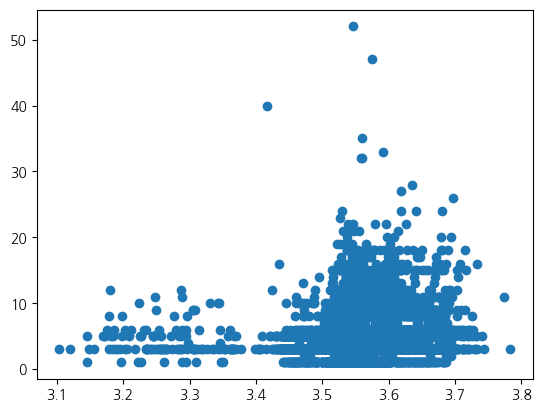

c:\Users\user\miniconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Average Training Loss: 2020.1586
Epoch 2/100, Average Training Loss: 21.5887
Epoch 3/100, Average Training Loss: 18.3075
Epoch 4/100, Average Training Loss: 17.5594
Epoch 5/100, Average Training Loss: 16.8190
Epoch 6/100, Average Training Loss: 16.7258
Epoch 7/100, Average Training Loss: 16.3418
Epoch 8/100, Average Training Loss: 16.4288
Epoch 9/100, Average Training Loss: 16.1234
Epoch 10/100, Average Training Loss: 16.0453
Epoch 11/100, Average Training Loss: 15.9976
Epoch 12/100, Average Training Loss: 16.0809
Epoch 13/100, Average Training Loss: 15.7010
Epoch 14/100, Average Training Loss: 15.9810
Epoch 15/100, Average Training Loss: 15.8492
Epoch 16/100, Average Training Loss: 15.8696
Epoch 17/100, Average Training Loss: 15.8162
Epoch 18/100, Average Training Loss: 15.7915
Epoch 19/100, Average Training Loss: 15.9477
Epoch 20/100, Average Training Loss: 15.6994
Epoch 21/100, Average Training Loss: 15.5515
Epoch 22/100, Average Training Loss: 15.7329
Epoch 23/100, Ave

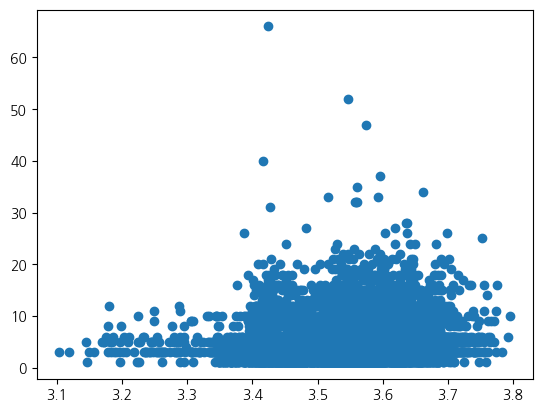

c:\Users\user\miniconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Average Training Loss: 1936.2735
Epoch 2/100, Average Training Loss: 27.3804
Epoch 3/100, Average Training Loss: 21.0435
Epoch 4/100, Average Training Loss: 19.2475
Epoch 5/100, Average Training Loss: 18.2121
Epoch 6/100, Average Training Loss: 16.7438
Epoch 7/100, Average Training Loss: 16.5038
Epoch 8/100, Average Training Loss: 16.3977
Epoch 9/100, Average Training Loss: 15.9511
Epoch 10/100, Average Training Loss: 15.8802
Epoch 11/100, Average Training Loss: 15.6551
Epoch 12/100, Average Training Loss: 15.7423
Epoch 13/100, Average Training Loss: 15.7330
Epoch 14/100, Average Training Loss: 15.6494
Epoch 15/100, Average Training Loss: 15.7405
Epoch 16/100, Average Training Loss: 15.5850
Epoch 17/100, Average Training Loss: 15.5068
Epoch 18/100, Average Training Loss: 15.4521
Epoch 19/100, Average Training Loss: 15.5183
Epoch 20/100, Average Training Loss: 15.4992
Epoch 21/100, Average Training Loss: 15.8272
Epoch 22/100, Average Training Loss: 15.5604
Epoch 23/100, Ave

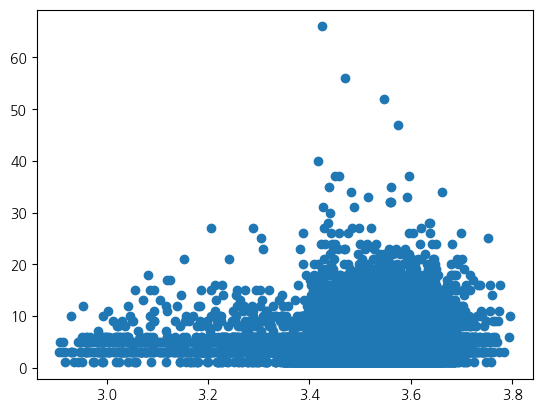

c:\Users\user\miniconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Average Training Loss: 1630.5460
Epoch 2/100, Average Training Loss: 29.5285
Epoch 3/100, Average Training Loss: 22.2652
Epoch 4/100, Average Training Loss: 19.9775
Epoch 5/100, Average Training Loss: 18.8684
Epoch 6/100, Average Training Loss: 18.1814
Epoch 7/100, Average Training Loss: 17.3793
Epoch 8/100, Average Training Loss: 16.9334
Epoch 9/100, Average Training Loss: 16.8125
Epoch 10/100, Average Training Loss: 16.3221
Epoch 11/100, Average Training Loss: 16.2670
Epoch 12/100, Average Training Loss: 16.2522
Epoch 13/100, Average Training Loss: 16.1158
Epoch 14/100, Average Training Loss: 16.1437
Epoch 15/100, Average Training Loss: 15.7971
Epoch 16/100, Average Training Loss: 15.8039
Epoch 17/100, Average Training Loss: 15.7346
Epoch 18/100, Average Training Loss: 15.7395
Epoch 19/100, Average Training Loss: 15.6958
Epoch 20/100, Average Training Loss: 15.7673
Epoch 21/100, Average Training Loss: 15.5259
Epoch 22/100, Average Training Loss: 15.5110
Epoch 23/100, Ave

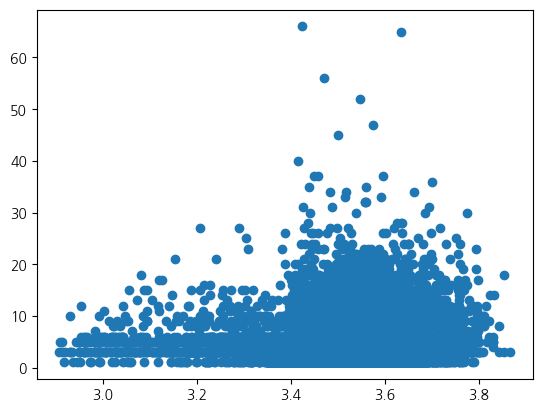

c:\Users\user\miniconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Average Training Loss: 2077.6842
Epoch 2/100, Average Training Loss: 28.7589
Epoch 3/100, Average Training Loss: 22.7059
Epoch 4/100, Average Training Loss: 18.1982
Epoch 5/100, Average Training Loss: 17.3397
Epoch 6/100, Average Training Loss: 16.9217
Epoch 7/100, Average Training Loss: 16.5404
Epoch 8/100, Average Training Loss: 16.6653
Epoch 9/100, Average Training Loss: 16.3891
Epoch 10/100, Average Training Loss: 16.3419
Epoch 11/100, Average Training Loss: 16.1700
Epoch 12/100, Average Training Loss: 16.1379
Epoch 13/100, Average Training Loss: 15.7093
Epoch 14/100, Average Training Loss: 15.7961
Epoch 15/100, Average Training Loss: 15.8454
Epoch 16/100, Average Training Loss: 15.7838
Epoch 17/100, Average Training Loss: 15.7677
Epoch 18/100, Average Training Loss: 15.7091
Epoch 19/100, Average Training Loss: 15.6184
Epoch 20/100, Average Training Loss: 15.5233
Epoch 21/100, Average Training Loss: 15.4014
Epoch 22/100, Average Training Loss: 15.4433
Epoch 23/100, Ave

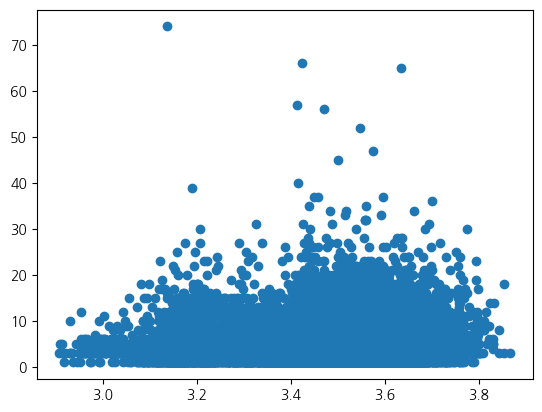


## 평균 검증 MSE: 11.824080185779753

## 평균 검증 RMSE: 3.4379195794757407
## 평균 검증 RSS: 93667.91417399325
## 평균 검증 MAE: 2.0284472933613897
## 평균 검증 R^2: -0.1493412863795412


,Model,Avg MSE,Avg RMSE,Avg RSS,Avg MAE,Avg R^2
0,DynamicANNWrapper,11.82408,3.43792,93667.914174,2.028447,-0.149341


In [7]:
df = RegCV(model,X_trn,y_trn,n_splits=5)
df.head()

In [ ]:
# park_df['소재지지번주소'] = park_df['소재지지번주소'].replace(to_replace=r'(\d+)', value='', regex=True)
#숫자만 나오는 부분 자르기

# '동' 뒤의 숫자만 남기고 나머지는 제거
# park_df['소재지지번주소'] = park_df['소재지지번주소'].replace(to_replace=r'동(\d+).*', value=r'\1', regex=True)


In [ ]:
# data = {
#     '칼럼1': ['A', 'B', 'A', 'B', 'A', 'C'],
#     '칼럼2': [1, 2, 3, 4, 5, 6],
#     '칼럼3': ['X', 'Y', 'Y', 'Y', 'Y', 'Z']
# }
# df = pd.DataFrame(data)

# # 중복값이 있는 행들을 그룹화하고 각 그룹에 대해 평균 또는 최빈값을 계산
# result_df = df.groupby('칼럼1').agg({
#     '칼럼2': 'mean',  # 숫자형 데이터의 경우 평균을 계산
#     '칼럼3': lambda x: x.mode().iloc[0]  # object 형 데이터의 경우 최빈값(mode)을 계산
# }).reset_index()

# # 결과 출력
# print(result_df)

In [ ]:
trdf = pd.read_csv("data/train.csv")
tstdf = pd.read_csv("data/test.csv")
# test에는 있지만 train에는 없는 칼럼 찾기
# columns_to_drop =  set(trdf.columns) - set(tstdf.columns) 

col = ['가해운전자 상해정도', '부상자수', '피해운전자 차종', '사망자수', '피해운전자 연령', '가해운전자 성별', '사고유형 - 세부분류', '피해운전자 성별', '가해운전자 차종', '중상자수', '경상자수', '피해운전자 상해정도', '가해운전자 연령', '법규위반']

# train에서 해당 칼럼 삭제
trdf = trdf.drop(columns=col, errors='ignore')

trdf = trdf.drop(columns=['ID' ,'사고일시'],axis=1)
tstdf = tstdf.drop(columns=['ID' , '사고일시'],axis=1)
trdf['시군구'] = trdf['시군구'].str.replace('대구광역시', '')
trdf[['구','동']] = trdf['시군구'].str.split(expand=True)
trdf = trdf.drop(columns=['시군구'], errors='ignore')
tstdf['시군구'] = tstdf['시군구'].str.replace('대구광역시', '')
tstdf[['구','동']] = tstdf['시군구'].str.split(expand=True)
tstdf = tstdf.drop(columns=['시군구'], errors='ignore')

# for c in trdf.columns:
#     unique_values = trdf[c].unique()
#     print(f"칼럼 '{c}'의 유니크한 값: {unique_values}")
#     print()

# for c in tstdf.columns:
#     unique_values = tstdf[c].unique()
#     print(f"칼럼 '{c}'의 유니크한 값: {unique_values}")
#     print()

In [ ]:
# 트레이닝 데이터와 테스트 데이터의 주소 정보 결합
all_data = pd.concat([trdf[['동']], tstdf[['동']]])

# 원핫 인코딩
all_data_encoded = pd.get_dummies(all_data, columns=['동'],dtype=int)

# 트레이닝 데이터에 대한 원핫 인코딩 결과
df_train_encoded = all_data_encoded.iloc[:len(trdf)]
trdf = pd.concat([trdf, df_train_encoded], axis=1)

# 테스트 데이터에 대한 원핫 인코딩 결과
df_test_encoded = all_data_encoded.iloc[len(tstdf):]
tstdf = pd.concat([tstdf, df_test_encoded], axis=1)



# 트레이닝 데이터와 테스트 데이터의 '기상상태'와 '도로형태' 정보 결합
all_weather_road_data = pd.concat([trdf[['기상상태', '도로형태']], tstdf[['기상상태', '도로형태']]])

# 각 칼럼에 대한 원핫 인코딩
all_weather_road_data_encoded = pd.get_dummies(all_weather_road_data, columns=['기상상태', '도로형태'],dtype=int)

# 각 데이터셋에 인코딩 결과 합치기
trdf = pd.concat([trdf, all_weather_road_data_encoded.iloc[:len(trdf)]], axis=1)
tstdf = pd.concat([tstdf, all_weather_road_data_encoded.iloc[len(trdf):]], axis=1)


# object_columns = trdf.select_dtypes(include=['object']).columns
# object_columns = tstdf.select_dtypes(include=['object']).columns
# # 해당 열들에 대해서 원핫 인코딩 적용
# trdf = pd.get_dummies(trdf, columns=object_columns,dtype=int)
# tstdf = pd.get_dummies(tstdf, columns=object_columns,dtype=int)


trdf.info(), tstdf.info()
object_columns = trdf.select_dtypes(include=['object']).columns
object_values = trdf[object_columns]
print(object_values)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

trdf_eclo = trdf['ECLO']
# 트레이닝 데이터와 테스트 데이터의 object 열을 선택
object_columns_train = trdf.select_dtypes(include='object').columns
object_columns_test = tstdf.select_dtypes(include='object').columns

# 트레이닝 데이터와 테스트 데이터의 object 열을 합친 후 원핫 인코딩
combined_df = pd.concat([trdf[object_columns_train], tstdf[object_columns_test]])
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first'는 더미 변수의 중복을 피하기 위해 첫 번째 카테고리를 제거합니다.

# fit_transform을 사용하면 훈련 데이터에서 학습하고, 같은 변환을 테스트 데이터에 적용할 수 있습니다.
combined_encoded = encoder.fit_transform(combined_df)

# 변환된 값을 다시 트레이닝 데이터와 테스트 데이터로 나누기
trdf_encoded = pd.DataFrame(combined_encoded[:len(trdf)], columns=encoder.get_feature_names_out(object_columns_train))
tstdf_encoded = pd.DataFrame(combined_encoded[len(trdf):], columns=encoder.get_feature_names_out(object_columns_test))
trdf_encoded['ECLO'] = trdf_eclo

In [ ]:
# 결과 확인
print("Encoded Training Data:")
print(trdf_encoded.info())
print("\nEncoded Test Data:")
print(tstdf_encoded.info())

In [ ]:
from get import get,prepro
from factory_model import factory_model, create_models , models_cv
from cv import CV
from sklearn.metrics import accuracy_score
import torch
import numpy as np

In [ ]:


# 훈련 데이터와 테스트 데이터를 numpy 배열로 변환
X_train = trdf_encoded.drop(columns=['ECLO']).values
y_train = trdf_encoded['ECLO'].values
X_test = tstdf_encoded.values

# numpy 배열을 PyTorch Tensor로 변환
X_trn = torch.tensor(X_train, dtype=torch.float32)
y_trn = torch.tensor(y_train, dtype=torch.float32)
X_tst = torch.tensor(X_test, dtype=torch.float32)

# 텐서 차원 확인
print("X_train_tensor shape:", X_trn.shape)
print("y_train_tensor shape:", y_trn.shape)
print("X_test_tensor shape:", X_tst.shape)


In [ ]:
model = factory_model(X_trn,y_trn,"config.json")
model.fit(X_trn,y_trn)
